# Lineer Modeller

## Lineer modeller için regresyon 
`ŷ = w[0] * x[0] + w[1] * x[1] + ... + w[p] * x[p] + b`

Burada w ve b modelin öğrendiği parametreler. y ise bizim tahminimiz. Matematikteki doğru denklemi üzerinden düşünürsek, 

`w bizim eğrimizin eğimi`

`b ise y-eksenini kestiği nokta`.

In [5]:
import numpy as np 
import matplotlib.pyplot as plt
import mglearn
from sklearn.model_selection import train_test_split

w[0]: 0.393906  b: -0.031804


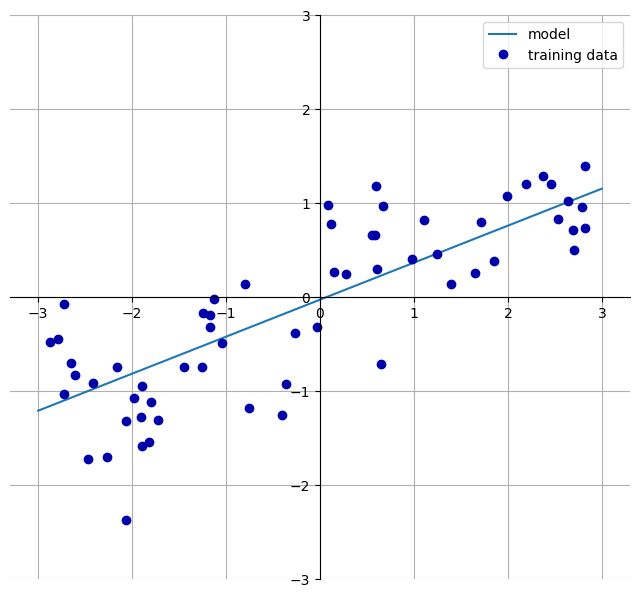

In [3]:
# w ve b değerlerini görme
mglearn.plots.plot_linear_regression_wave()

# linear regression (Ordinary Least Squares (OLS))
w ve b’yı mean squared error ile olabildiğince küçük seçiyor. Overfitting olmaya müsait.

In [17]:
from sklearn.linear_model import LinearRegression
X,y = mglearn.datasets.make_wave(n_samples=60)
X_train , X_test, y_train, y_test = train_test_split(X,y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

In [18]:
print("lr.coef_: {}".format(lr.coef_)) # w 
print("lr.intercept_: {}".format(lr.intercept_)) # b

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746


In [19]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))
print("UNDERFITTING")

Training set score: 0.67
Test set score: 0.66
UNDERFITTING


In [20]:
# daha büyük bir veri seti ile çalışalım
X,y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

In [22]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))
print("OVERFITTING")

Training set score: 0.95
Test set score: 0.61
OVERFITTING


# RIDGE REGRESSION
OLS ile aynı formülü kullanıyor. Farklı olarak ise bu yöntemde w olabildiğince küçük seçilmeye çalışıyor (sıfıra yakın). Böylelikle her bir feature sonuca çok daha az etki ediyor, buna genelleştirme (regularization) deniyor. Lineer regresyona kıyasla daha zor overfit oluyor. Daha az kompleks olan modeller eğitim performansında daha götü olabiliyor fakat genelleştirme konusunda daha başarılılar. Ridge regression yönteminde genelleştirme daha ön planda.

In [26]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))
print("daha iyi bir doğruluk")

Training set score: 0.89
Test set score: 0.75
daha iyi bir doğruluk


alpha değeri bizim w değerlerimizde ne kadar büyük değişiklikler yaptıracağımızı belirliyor. 

In [27]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

Training set score: 0.79
Test set score: 0.64


In [28]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))


Training set score: 0.93
Test set score: 0.77


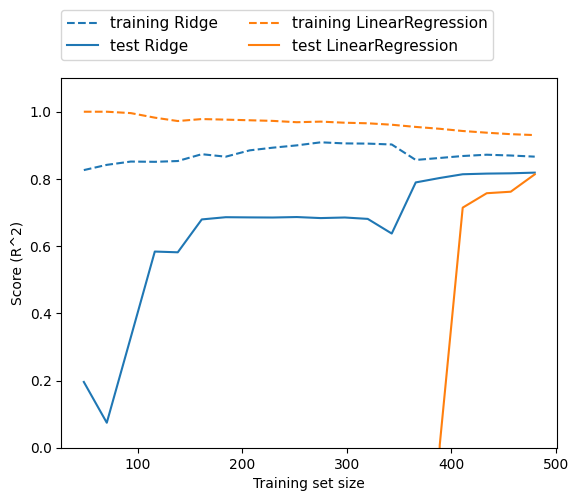

In [29]:
mglearn.plots.plot_ridge_n_samples()


# LASSO
Bu yöntemde de w, L1 regularization yöntemiyle sıfıra yakın seçilir. Bu yöntemde bazı w'lar tam olarak 0 yapılır. Böylelikle bazı feature'lar gözardı edilir, sadece gerekli görülen feature'lar üzerinden tahminler yapılır.

İçerisinde çok az feature'ın gerekli olduğuçok büyük veri setlerinde kullanılabilir

In [31]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features user: {}".format(np.sum(lasso.coef_ != 0)))

Training set score: 0.29
Test set score: 0.21
Number of features user: 4


underfitting'den kurtulmak için 100000 iterasyon gerçekleştiriyoruz ve alphayı 0.01 kabul ediyoruz

In [32]:
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features user: {}".format(np.sum(lasso001.coef_ != 0)))

Training set score: 0.90
Test set score: 0.77
Number of features user: 33


In [34]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso00001.coef_ != 0)))


Training set score: 0.95
Test set score: 0.64
Number of features used: 96


### sınıflandırma için lineer modeller
lineer (binary: ikilik) sınıflandırma formülü lineer regresyon formülüne benzer.

`ŷ = w[0] * x[0] + w[1] * x[1] + ... + w[p] * x[p] + b > 0`

Burada sonuç 0'dan küçük veya eşitse **-1**, eğer sıfırdan büyükse **+1** değerini alır. 
Lineer sınıflandırmada, sınıflandırma **karar sınırıyla** yapılır. Yani iki sınıf bir doğruyla, düzlemle, hiperdüzlemle (sınıflandırılacak verinin boyutuna göre) birbirinden ayrılır.

Yanlış sınıflandırmalara göre **w** ve **b**'yi periyodik olarak düzenleme imkanı olmadığından, algoritmalar bunun yerine farklı **kayıp fonksiyonları (loss function)** kullanarak eğitim verisine en iyi uyumu sağlamaya çalışır.

En çok kullanılan iki tanesi 
- Logistic Regression (linear_model.LogisticRegression)
- Linear support vector machines (svm.LinearSVC)

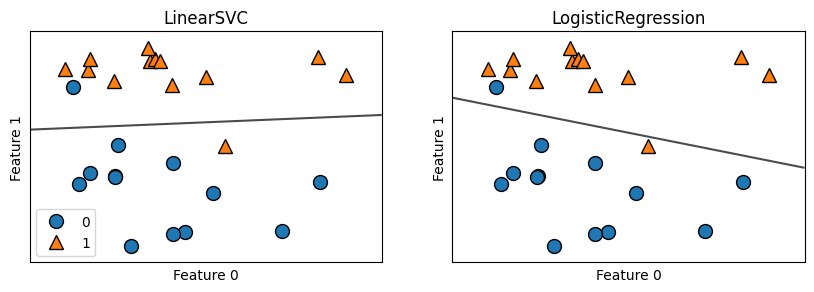

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
import mglearn
import matplotlib.pyplot as plt 

X,y = mglearn.datasets.make_forge()

fig,axes = plt.subplots(1,2, figsize=(10,3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
     clf = model.fit(X, y)
     mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
     ax=ax, alpha=.7)
     mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
     ax.set_title("{}".format(clf.__class__.__name__))
     ax.set_xlabel("Feature 0")
     ax.set_ylabel("Feature 1")
axes[0].legend()



ikisi de sınıfları ayırmak için karar sınırını belirler ve L2 regularizasyonunu uygular. Bu regüle edicinin gücü de C parametresiyle kontrol edilir. C yüksekse, model eğitim verisine daha sıkı uyum sağlar ve bireysel noktalarla daha çok ilgilenir. C düşükse, model daha basit bir karar sınırı çizer ve ağırlıkları (w) sıfıra yakın tutarak overfitting'i önlemeye çalışır.

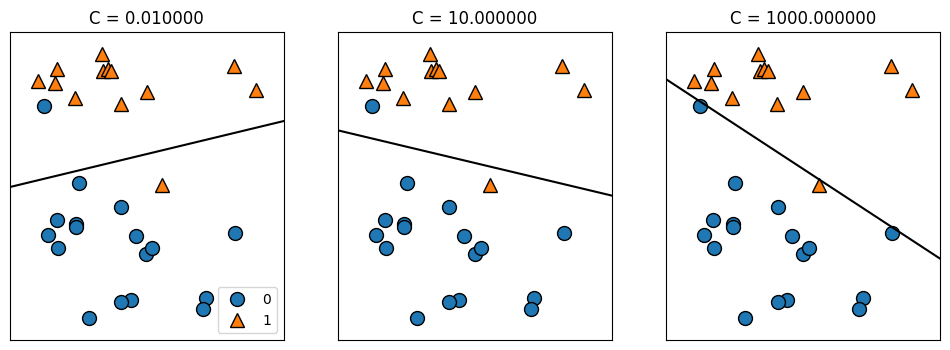

In [6]:
mglearn.plots.plot_linear_svc_regularization()

sayfa 72